# Goal: 
Look at the average minimum of the M3 signal; this trough is the closest I can get to an unstretched/unactivated filament

In [1]:
import numpy as np
import pandas
import glob
import scipy.io

# Plot parameters 
import matplotlib
import matplotlib.pyplot as plt

font = {'family' : 'Tahoma',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')





In [49]:
perm_bootstrap = pandas.read_csv('Perm_bootstrap.csv')
acceptable_trials = perm_bootstrap.where((perm_bootstrap.M3_c < 5)).dropna(how = 'all').Trial
acceptable_trials_titles = ['M7 T1', 'M10 T2', 'M11 T2', 'M11 T4', 'M12 T2', 'M14 T3']


In [3]:
# This doesn't take into account the permutation bootstrap; it may be too inclusive? 
#acceptable_trials = ['m07_t01_15', 'm07_t03_15', 'm07_t06_15','m10_t02_16','m11_t02_16','m11_t04_16',
#                   'm12_t02_16', 'm14_t03_16','m14_t05_16', 'm15_t01_16', 'm15_t03_16']

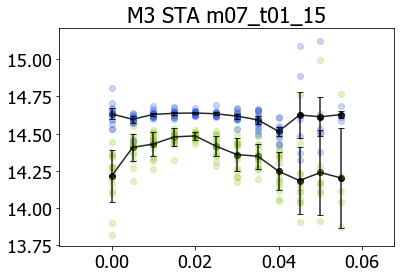

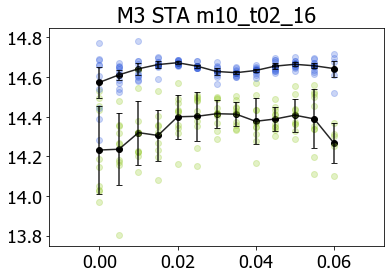

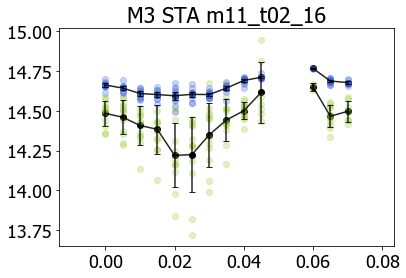

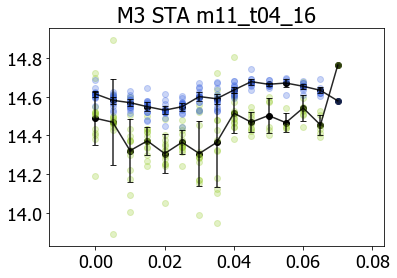

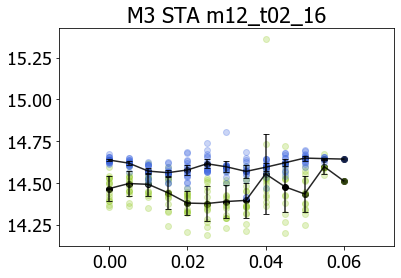

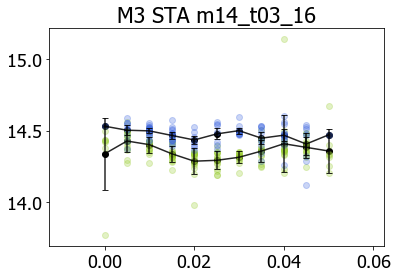

In [3]:
M3minimum_averages = []
#M6minimum_averages = []
for trial in acceptable_trials:
    d = pandas.read_csv('../DataProcessing/ProcessedData/' + trial + '_det.csv') 
    
    # Create new a column to store the seconds elapsed since the beginning of the ISI
    ISI_seconds = []
    for i in d.ISI.drop_duplicates():
        temp = d.where(d.ISI == i).dropna(how = 'all')
        ISI_seconds.append(np.arange(0,len(temp))/200)
    d['ISI_seconds'] = np.concatenate(ISI_seconds)
    
    # Create a new dataframe that only has the relevant info
    new_d = d[['M3_c', 'M6_c', 'ISI', 'ISI_seconds']]
    
    # All of the time points encompassed by the longest ISI
    new_d.ISI_seconds.drop_duplicates()
    
    # Pivot the dataframe so that columns are the time points elapsed within the ISI and
    # and the rows are the ISI number
    
    new_d_p = new_d.pivot(index = 'ISI', columns = 'ISI_seconds')
    
    # Find the averages and SDs
    M3avgs = []
    M3sds = []
    M6avgs = []
    M6sds = []
    
    for i in new_d.ISI_seconds.drop_duplicates():
        M3avgs.append(new_d_p['M3_c'][i].mean())
        M3sds.append(new_d_p['M3_c'][i].std())
        M6avgs.append(2*new_d_p['M6_c'][i].mean())
        M6sds.append(new_d_p['M6_c'][i].std())
        
    # Make a scatter plot for each 
        
    plt.scatter(new_d.ISI_seconds.drop_duplicates(), M3avgs, marker = 'o', c = 'black')
    plt.scatter(new_d.ISI_seconds.drop_duplicates(), M6avgs, marker = 'o', c = 'black')
    
    plt.scatter(new_d.ISI_seconds, new_d.M3_c, marker = 'o', c = 'yellowgreen', alpha = .28)
    plt.scatter(new_d.ISI_seconds, 2*new_d.M6_c, marker = 'o', c = 'royalblue', alpha = .28)
    
    plt.errorbar(new_d.ISI_seconds.drop_duplicates(), M3avgs, yerr = M3sds, c = 'black', alpha = .85, capsize = 3)
    plt.errorbar(new_d.ISI_seconds.drop_duplicates(), M6avgs, yerr = M6sds, c = 'black', alpha = .85, capsize = 3)
    
    plt.title('M3 STA ' + trial)
    #plt.savefig('M3_analysis_' + trial + 'png', dpi = 200, bbox_inches='tight')
    plt.show()
    
    # Store the minimum averages 
    
    M3minimum_averages.append(min(M3avgs))
    #M6minimum_averages.append(min(M6avgs))
    


In [5]:
print('M3 mean: ', np.mean(M3minimum_averages))
print('M3 SDs: ', np.std(M3minimum_averages))



M3 mean:  14.267532592122853
M3 SDs:  0.06319921187558374


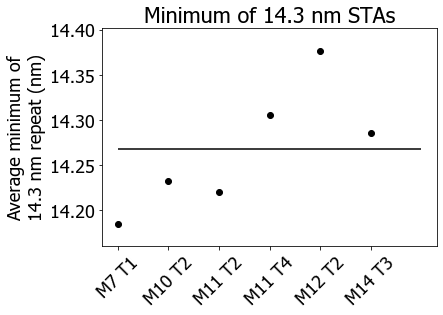

In [51]:
plt.scatter(acceptable_trials_titles, M3minimum_averages, c = 'black', label = 'average mins')
plt.xticks(rotation = 45)
plt.title('Minimum of 14.3 nm STAs')
plt.ylabel('Average minimum of\n14.3 nm repeat (nm)')
plt.hlines(np.mean(M3minimum_averages), 0, len(M3minimum_averages), label = 'average of averages')
plt.savefig('avgmin_sig_periodic_signal.png', dpi = 200, bbox_inches='tight')

# Do the exact same thing for M6

In [47]:
perm_bootstrap = pandas.read_csv('Perm_bootstrap.csv')
acceptable_trials = perm_bootstrap.where((perm_bootstrap.M6_c < 5)).dropna(how = 'all').Trial
acceptable_trials_titles = ['M7 T1', 'M7 T3', 'M7 T6', 'M11 T2', 'M11 T4', 'M12 T2', 'M15 T3']

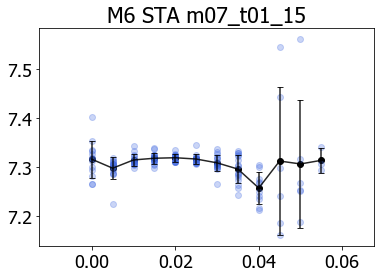

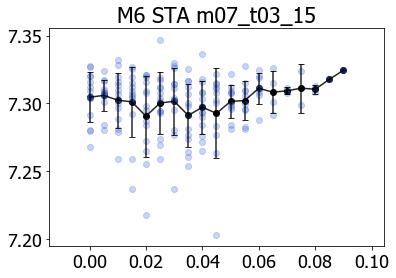

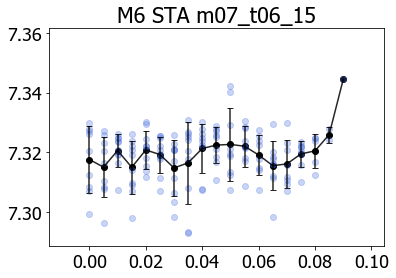

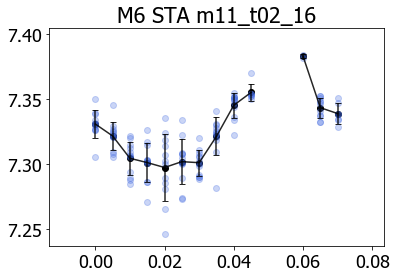

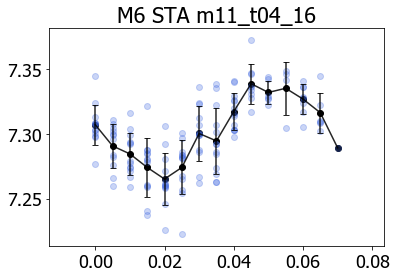

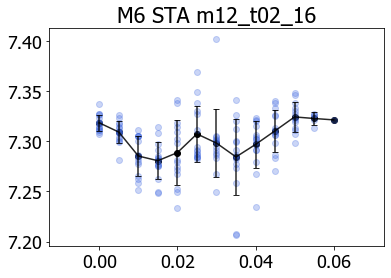

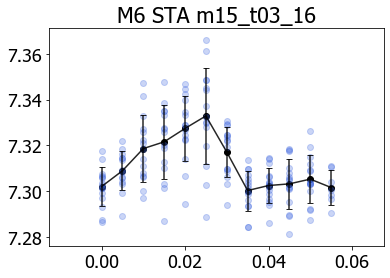

In [31]:
M6minimum_averages = []
for trial in acceptable_trials:
    d = pandas.read_csv('../DataProcessing/ProcessedData/' + trial + '_det.csv') 
    
    # Create new a column to store the seconds elapsed since the beginning of the ISI
    ISI_seconds = []
    for i in d.ISI.drop_duplicates():
        temp = d.where(d.ISI == i).dropna(how = 'all')
        ISI_seconds.append(np.arange(0,len(temp))/200)
    d['ISI_seconds'] = np.concatenate(ISI_seconds)
    
    # Create a new dataframe that only has the relevant info
    new_d = d[['M3_c', 'M6_c', 'ISI', 'ISI_seconds']]
    
    # All of the time points encompassed by the longest ISI
    new_d.ISI_seconds.drop_duplicates()
    
    # Pivot the dataframe so that columns are the time points elapsed within the ISI and
    # and the rows are the ISI number
    
    new_d_p = new_d.pivot(index = 'ISI', columns = 'ISI_seconds')
    
    # Find the averages and SDs
    #M3avgs = []
    #M3sds = []
    M6avgs = []
    M6sds = []
    
    for i in new_d.ISI_seconds.drop_duplicates():
        #M3avgs.append(new_d_p['M3_c'][i].mean())
        #M3sds.append(new_d_p['M3_c'][i].std())
        M6avgs.append(new_d_p['M6_c'][i].mean())
        M6sds.append(new_d_p['M6_c'][i].std())
        
    # Make a scatter plot for each 
        
    #plt.scatter(new_d.ISI_seconds.drop_duplicates(), M3avgs, marker = 'o', c = 'black')
    plt.scatter(new_d.ISI_seconds.drop_duplicates(), M6avgs, marker = 'o', c = 'black')
    
    #plt.scatter(new_d.ISI_seconds, new_d.M3_c, marker = 'o', c = 'yellowgreen', alpha = .28)
    plt.scatter(new_d.ISI_seconds, new_d.M6_c, marker = 'o', c = 'royalblue', alpha = .28)
    
    #plt.errorbar(new_d.ISI_seconds.drop_duplicates(), M3avgs, yerr = M3sds, c = 'black', alpha = .85, capsize = 3)
    plt.errorbar(new_d.ISI_seconds.drop_duplicates(), M6avgs, yerr = M6sds, c = 'black', alpha = .85, capsize = 3)
    
    plt.title('M6 STA ' + trial)
    #plt.savefig('M3_analysis_' + trial + 'png', dpi = 200, bbox_inches='tight')
    plt.show()
    
    # Store the minimum averages 
    
    #M3minimum_averages.append(min(M3avgs))
    M6minimum_averages.append(min(M6avgs))
    



In [32]:
#print('M3: ', np.mean(M3minimum_averages))
print('M6 mean: ', np.mean(M6minimum_averages))
print('M6 SDs: ', np.std(M6minimum_averages))

M6 mean:  7.286606439063017
M6 SDs:  0.018641407102891864


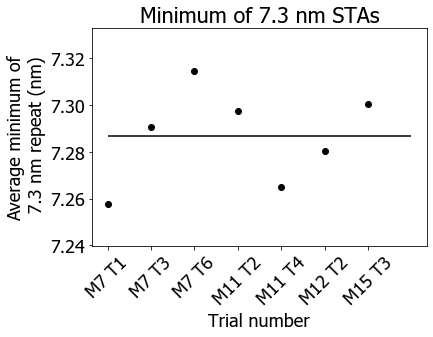

In [48]:
plt.scatter(acceptable_trials_titles, M6minimum_averages, c = 'black', label = 'average mins')
plt.xticks(rotation = 45)
plt.title('Minimum of 7.3 nm STAs')
plt.xlabel('Trial number')
plt.ylabel('Average minimum of\n 7.3 nm repeat (nm)')
plt.hlines(np.mean(M6minimum_averages), 0, len(M6minimum_averages), label = 'average of averages')
plt.savefig('M6avgmin_sig_periodic_signal.png', dpi = 200, bbox_inches='tight')

In [29]:
len(acceptable_trials)
#len(M6minimum_averages)
acceptable_trials

0     m07_t01_15
1     m07_t03_15
2     m07_t06_15
4     m11_t02_16
5     m11_t04_16
6     m12_t02_16
10    m15_t03_16
Name: Trial, dtype: object

In [ ]:
['M7 T1', 'M7 T3', 'M7 T6', 'M11 T2', 'M11 T4', 'M12 T2', 'M15 T3']